<a href="https://colab.research.google.com/github/BrainConnection/Small_Project/blob/main/Quantum%20Squeezing%20Induced%20Optical%20Nonreciprocity%20Reproduce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Setting



In [1]:
!pip install qutip
!pip install numpy
!pip install matplotlib
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 22.1 MB/s eta 0:00:00


In [2]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

# Steady State Analysis & Hilbert Space Dimension Prediction

This page, figures are reproduced by just using equations introduced in "Quantum Squeezing Induced Optical Nonreciprocity" (https://arxiv.org/pdf/2110.05016)

When we ignore AC Stark Shift caused by input signal which can be modeled like a coherent drive, the system can be simplified as two Ring A, B coupled by coupling strength J_s (J_0) in FW Signal case (BW Signal case).

Therefore, when input signal frequency is equal to dressed resonance frequency of this system, average photon number of each ring would be maximized.

I analyzed average photon number of each resonator in FW/BW case for figure (a) & (d). In this page, I just used steady state photon number formula which can be acquired from quantum langevin equation.

Next page, I will use QuTiP to solve time evolution of this system.  Analyzing transient state using QuTiP will give more information like ring-up, ring-down time.




We can predict dressed resonance frequency of this system. The most important assumption is that this system is at single-photon regime.

FW case Hamiltonian ignoring AC Stark Shift

$H_{bw} = \Delta_p^a a^\dagger a + \Delta_p^{bs} b_s^\dagger b_s + J_s (a^\dagger b_s + a b_s ^\dagger)$

BW case Hamiltonian ignoring AC Stark Shift

$H_{fw} = \Delta_p^a a^\dagger a + \Delta_p^b b^\dagger b + J_0 (a^\dagger b + a b ^\dagger)$

FW case Hamiltonian at Single Photon Regime

$H_{fw} |0,1\rangle = \Delta_p^{bs} |0,1\rangle + J_s |1,0\rangle$

$H_{fw} |1,0\rangle = \Delta_p^a |1,0\rangle + J_s |0,1\rangle$

Eigenvalue (Dressed Resonance Frequency)

$ \tilde{\omega} = \frac{\Delta_p^a + \Delta_p^{bs}}{2} \pm \sqrt{J_s^2 + (\frac{\Delta_p^a - \Delta_p^{bs}}{2})^2} $

Photon number is on resonance when $\omega_{in} - \frac{\omega_p}{2} = \tilde{\omega}$

$-\tilde{\omega} = \frac{\omega_p}{2} - \omega_{in} = (\omega_a - \omega_{in}) - (\omega_a - \frac{\omega_p}{2}) = \Delta - \Delta_p^a $

Therefore, photon number of Ring A/B is on resonance when $ \Delta = \Delta_p^a - \tilde{\omega} = \frac{\Delta_p^a - \Delta_p^{bs}}{2} \pm \sqrt{J_s^2 + (\frac{\Delta_p^a - \Delta_p^{bs}}{2})^2} $

BW case Hamiltonian at Single Photon Regime

$H_{fw} |0,1\rangle = \Delta_p^b |0,1\rangle + J_0 |1,0\rangle$

$H_{fw} |1,0\rangle = \Delta_p^a |1,0\rangle + J_0 |0,1\rangle$

Eigenvalue (Dressed Resonance Frequency)

$ \tilde{\omega} = \frac{\Delta_p^a + \Delta_p^b}{2} \pm \sqrt{J_0^2 + (\frac{\Delta_p^a - \Delta_p^b}{2})^2} $

Photon number is on resonance when $\omega_{in} - \frac{\omega_p}{2} = \tilde{\omega}$

$-\tilde{\omega} = \frac{\omega_p}{2} - \omega_{in} = (\omega_a - \omega_{in}) - (\omega_a - \frac{\omega_p}{2}) = \Delta - \Delta_p^a $

Therefore, photon number of Ring A/B is on resonance when $ \Delta = \Delta_p^a - \tilde{\omega} = \frac{\Delta_p^a - \Delta_p^b}{2} \pm \sqrt{J_0^2 + (\frac{\Delta_p^a - \Delta_p^b}{2})^2} $

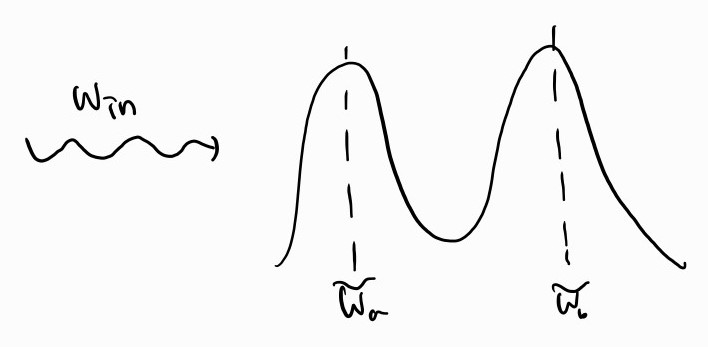

## Figure 2(a)

In [202]:
# figure 2(a)
# Parameter normalized by kappa (intrinsic + extrinsic)
# linewidth (intrinsic + extrinsic) of Ring A and Ring B same

detune_pa = 10.3
detune_pb = 10.3
Omega_p = 10
J_0 = 0.99

kappa_ex1 = 0.99
kappa_ex2 = 0.99

beta = Omega_p / detune_pb
rp = 0.25 * np.log((1+beta)/(1-beta))

J_s = np.cosh(rp)*J_0

print(beta)
print(rp)

0.9708737864077669
1.0536484225934186


In [203]:
# Parameter normalized by kappa

detune_list = np.linspace(-10, 15, 250)

detune_in = detune_pb - detune_list
detune_pbs = detune_pb * np.sqrt(1-beta**2)
detune_bs = detune_pbs - detune_in

G_s = J_s**4 + 2 * J_s**2 * (1 - detune_list * detune_bs) + (1 + detune_list**2) * (1 + detune_bs**2)
eta_s = 1 - 2 * 1 * kappa_ex1 - detune_list * detune_bs
A_s = ((1 - 2 * kappa_ex1)**2 + detune_list**2) * (1 + detune_bs**2)
Q_s = 4 * J_s**2 + 1 * (4 + (detune_list - detune_bs)**2)

Nnoise = 2 * np.sinh(rp)**2 * J_s**2 / Q_s

G_0 = J_0**4 + 2 * J_0**2 * (1 - detune_list**2) + (1 + detune_list**2)**2
eta_0 = 1 - 2 * 1 * kappa_ex1 - detune_list**2
A_0 = ((1 - 2 * kappa_ex1)**2 + detune_list**2) * (1 + detune_list**2)

In [204]:
# Photon number when alpha**2/kappa = 1

na_fw = 2 * kappa_ex1 * (1 + detune_bs**2) / G_s
na_fw_noise = 2 * kappa_ex1 * (1 + detune_bs**2) / G_s + Nnoise
nb_fw = 2 * kappa_ex1 * J_s**2 / G_s

na_bw = 2 * kappa_ex1 * (1 + detune_list**2) / G_0
nb_bw = 2 * kappa_ex1 * J_0**2 / G_0


# Transmission

T_12 = (J_s**4 + 2 * eta_s * J_s**2 + A_s) / G_s
T_21 = (J_0**4 + 2 * eta_0 * J_0**2 + A_0) / G_0
T_23 = 4 * kappa_ex1 * kappa_ex2 * J_0**2 / G_0

Ring A Resonance Point 1 : -0.36144578313253106
Ring A Resonance Point 2 : 8.574297188755018

Ring B Resonance Point 1 : -0.16064257028112472
Ring B Resonance Point 2 : 8.072289156626507


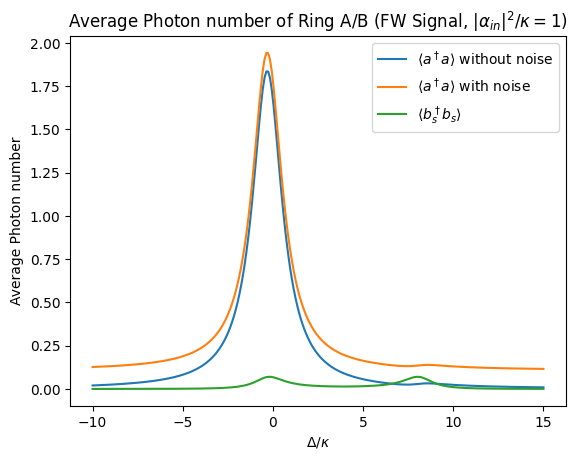

In [205]:
# Average photon number of Ring A/B FW signal case

plt.figure()
plt.plot(detune_list, na_fw, label = r"$\langle a^\dagger a \rangle$ without noise")
plt.plot(detune_list, na_fw_noise, label = r"$\langle a^\dagger a \rangle$ with noise")
plt.plot(detune_list, nb_fw, label = r"$\langle b_s^\dagger b_s \rangle$")

plt.legend()
plt.title(r"Average Photon number of Ring A/B (FW Signal, $|\alpha_{in}|^2/\kappa = 1$)")
plt.xlabel(r"$\Delta / \kappa$")
plt.ylabel("Average Photon number")


print("Ring A Resonance Point 1 : {0}".format(detune_list[np.argmax(na_fw)]))
print("Ring A Resonance Point 2 : {0}".format(detune_list[np.argmax(na_fw[170:])+170]))
print()
print("Ring B Resonance Point 1 : {0}".format(detune_list[np.argmax(nb_fw[:150])]))
print("Ring B Resonance Point 2 : {0}".format(detune_list[np.argmax(nb_fw[150:])+150]))

Ring A Resonance Point 1 : -1.0642570281124506
Ring A Resonance Point 2 : 1.144578313253012

Ring B Resonance Point 1&2 : 0.040160642570281624


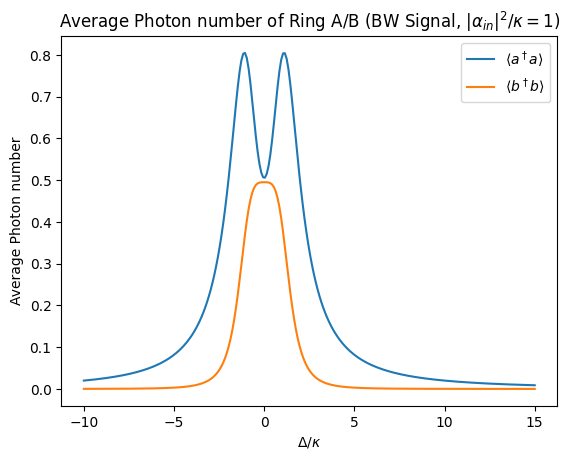

In [206]:
# Average photon number of Ring A/B BW signal case

plt.figure()
plt.plot(detune_list, na_bw, label = r"$\langle a^\dagger a \rangle$")
plt.plot(detune_list, nb_bw, label = r"$\langle b^\dagger b \rangle$")

plt.legend()
plt.title(r"Average Photon number of Ring A/B (BW Signal, $|\alpha_{in}|^2/\kappa = 1$)")
plt.xlabel(r"$\Delta / \kappa$")
plt.ylabel("Average Photon number")

print("Ring A Resonance Point 1 : {0}".format(detune_list[np.argmax(na_bw[:100])]))
print("Ring A Resonance Point 2 : {0}".format(detune_list[np.argmax(na_bw[100:])+100]))
print()
print("Ring B Resonance Point 1&2 : {0}".format(detune_list[np.argmax(nb_bw)]))

T12 Resonance Point 1 : -0.261044176706827
T12 Resonance Point 2 : 8.072289156626507

T21 Resonance Point 1/2 : 0.040160642570281624

T23 Resonance Point 1/2 : 0.040160642570281624


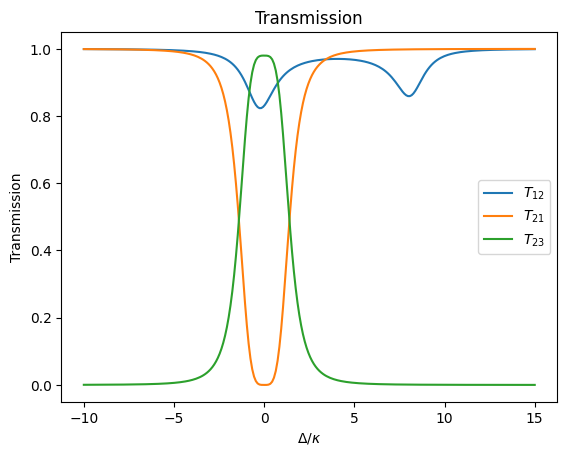

In [207]:
# Transmission Plot

plt.figure()

plt.plot(detune_list, T_12, label = r"$T_{12}$")
plt.plot(detune_list, T_21, label = r"$T_{21}$")
plt.plot(detune_list, T_23, label = r"$T_{23}$")

plt.legend()
plt.title("Transmission")
plt.xlabel(r"$\Delta / \kappa$")
plt.ylabel("Transmission")


print("T12 Resonance Point 1 : {0}".format(detune_list[np.argmin(T_12)]))
print("T12 Resonance Point 2 : {0}".format(detune_list[np.argmin(T_12[150:])+150]))
print()
print("T21 Resonance Point 1/2 : {0}".format(detune_list[np.argmin(T_21)]))
print()
print("T23 Resonance Point 1/2 : {0}".format(detune_list[np.argmax(T_23)]))

In [208]:
# Calculate FW Signal Resonance Condition

print("Resonance Point 1 : {0}".format((detune_pa - detune_pbs)/2 - np.sqrt(J_s**2 + ((detune_pa - detune_pbs)/2)**2)))
print("Resonance Point 2 : {0}".format((detune_pa - detune_pbs)/2 + np.sqrt(J_s**2 + ((detune_pa - detune_pbs)/2)**2)))

Resonance Point 1 : -0.31133931735809384
Resonance Point 2 : 8.143546781507476


In [209]:
# Calculate BW Signal Resonance Condition

print("Resonance Point 1 : {0}".format((detune_pa - detune_pb)/2 - np.sqrt(J_0**2 + ((detune_pa - detune_pb)/2)**2)))
print("Resonance Point 2 : {0}".format((detune_pa - detune_pb)/2 + np.sqrt(J_0**2 + ((detune_pa - detune_pb)/2)**2)))

Resonance Point 1 : -0.99
Resonance Point 2 : 0.99


## Figure 2(d)

In [210]:
# figure 2(d)
# Parameter normalized by kappa (intrinsic + extrinsic)
# linewidth (intrinsic + extrinsic) of Ring A and Ring B same

detune_pa = 15
detune_pb = 15
Omega_p = 13
J_0 = 2.8

kappa_ex1 = 0.99
kappa_ex2 = 0.99

beta = Omega_p / detune_pb
rp = 0.25 * np.log((1+beta)/(1-beta))

J_s = np.cosh(rp)*J_0

print(beta)
print(rp)

0.8666666666666667
0.6597643324038147


In [211]:
# Parameter normalized by kappa

detune_list = np.linspace(-10, 15, 250)

detune_in = detune_pb - detune_list
detune_pbs = detune_pb * np.sqrt(1-beta**2)
detune_bs = detune_pbs - detune_in

G_s = J_s**4 + 2 * J_s**2 * (1 - detune_list * detune_bs) + (1 + detune_list**2) * (1 + detune_bs**2)
eta_s = 1 - 2 * 1 * kappa_ex1 - detune_list * detune_bs
A_s = ((1 - 2 * kappa_ex1)**2 + detune_list**2) * (1 + detune_bs**2)
Q_s = 4 * J_s**2 + 1 * (4 + (detune_list - detune_bs)**2)

Nnoise = 2 * np.sinh(rp)**2 * J_s**2 / Q_s

G_0 = J_0**4 + 2 * J_0**2 * (1 - detune_list**2) + (1 + detune_list**2)**2
eta_0 = 1 - 2 * 1 * kappa_ex1 - detune_list**2
A_0 = ((1 - 2 * kappa_ex1)**2 + detune_list**2) * (1 + detune_list**2)

In [212]:
# Photon number when alpha**2/kappa = 1

na_fw = 2 * kappa_ex1 * (1 + detune_bs**2) / G_s
na_fw_noise = 2 * kappa_ex1 * (1 + detune_bs**2) / G_s + Nnoise
nb_fw = 2 * kappa_ex1 * J_s**2 / G_s

na_bw = 2 * kappa_ex1 * (1 + detune_list**2) / G_0
nb_bw = 2 * kappa_ex1 * J_0**2 / G_0


# Transmission

T_12 = (J_s**4 + 2 * eta_s * J_s**2 + A_s) / G_s
T_21 = (J_0**4 + 2 * eta_0 * J_0**2 + A_0) / G_0
T_23 = 4 * kappa_ex1 * kappa_ex2 * J_0**2 / G_0

Ring A Resonance Point 1 : -1.3654618473895574
Ring A Resonance Point 2 : 9.277108433734938

Ring B Resonance Point 1 : -1.2650602409638552
Ring B Resonance Point 2 : 8.775100401606426


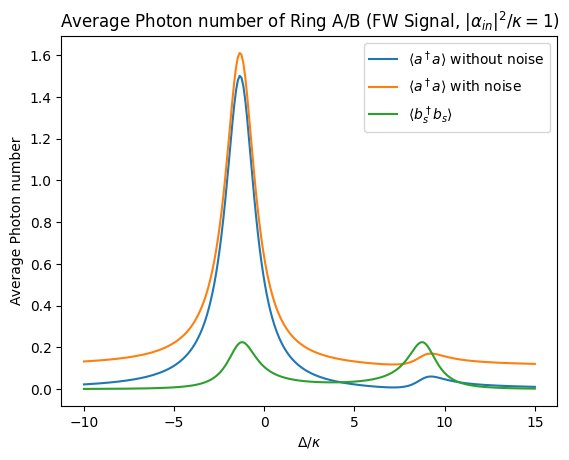

In [213]:
# Average photon number of Ring A/B FW signal case

plt.figure()
plt.plot(detune_list, na_fw, label = r"$\langle a^\dagger a \rangle$ without noise")
plt.plot(detune_list, na_fw_noise, label = r"$\langle a^\dagger a \rangle$ with noise")
plt.plot(detune_list, nb_fw, label = r"$\langle b_s^\dagger b_s \rangle$")

plt.legend()
plt.title(r"Average Photon number of Ring A/B (FW Signal, $|\alpha_{in}|^2/\kappa = 1$)")
plt.xlabel(r"$\Delta / \kappa$")
plt.ylabel("Average Photon number")


print("Ring A Resonance Point 1 : {0}".format(detune_list[np.argmax(na_fw)]))
print("Ring A Resonance Point 2 : {0}".format(detune_list[np.argmax(na_fw[170:])+170]))
print()
print("Ring B Resonance Point 1 : {0}".format(detune_list[np.argmax(nb_fw[:150])]))
print("Ring B Resonance Point 2 : {0}".format(detune_list[np.argmax(nb_fw[150:])+150]))

Ring A Resonance Point 1 : -2.971887550200803
Ring A Resonance Point 2 : 2.951807228915662

Ring B Resonance Point 1 : -2.570281124497992
Ring B Resonance Point 2 : 2.6506024096385534


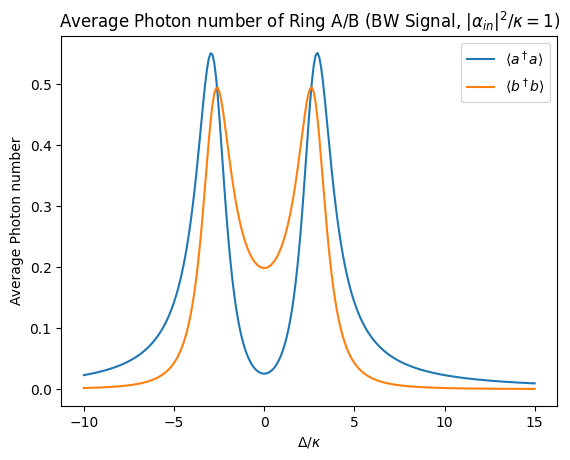

In [214]:
# Average photon number of Ring A/B BW signal case

plt.figure()
plt.plot(detune_list, na_bw, label = r"$\langle a^\dagger a \rangle$")
plt.plot(detune_list, nb_bw, label = r"$\langle b^\dagger b \rangle$")

plt.legend()
plt.title(r"Average Photon number of Ring A/B (BW Signal, $|\alpha_{in}|^2/\kappa = 1$)")
plt.xlabel(r"$\Delta / \kappa$")
plt.ylabel("Average Photon number")


print("Ring A Resonance Point 1 : {0}".format(detune_list[np.argmax(na_bw[:100])]))
print("Ring A Resonance Point 2 : {0}".format(detune_list[np.argmax(na_bw[100:])+100]))
print()
print("Ring B Resonance Point 1 : {0}".format(detune_list[np.argmax(nb_bw[:100])]))
print("Ring B Resonance Point 2 : {0}".format(detune_list[np.argmax(nb_bw[100:])+100]))

T12 Resonance Point 1 : -1.2650602409638552
T12 Resonance Point 2 : 8.775100401606426

T21 Resonance Point 1 : -2.570281124497992
T21 Resonance Point 2 : 2.6506024096385534

T23 Resonance Point 1 : -2.570281124497992
T23 Resonance Point 2 : 2.6506024096385534


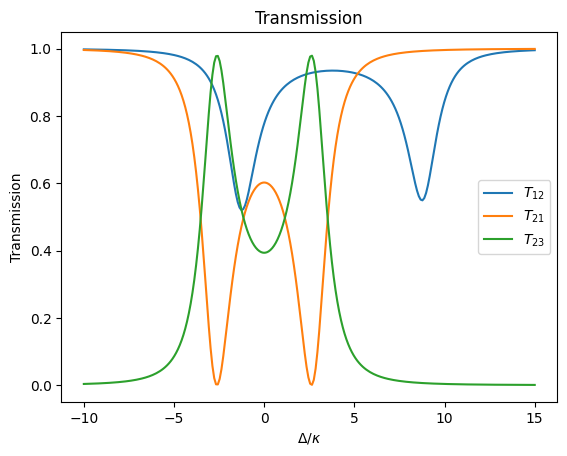

In [215]:
# Transmission Plot

plt.figure()

plt.plot(detune_list, T_12, label = r"$T_{12}$")
plt.plot(detune_list, T_21, label = r"$T_{21}$")
plt.plot(detune_list, T_23, label = r"$T_{23}$")

plt.legend()
plt.title("Transmission")
plt.xlabel(r"$\Delta / \kappa$")
plt.ylabel("Transmission")


print("T12 Resonance Point 1 : {0}".format(detune_list[np.argmin(T_12)]))
print("T12 Resonance Point 2 : {0}".format(detune_list[np.argmin(T_12[150:])+150]))
print()
print("T21 Resonance Point 1 : {0}".format(detune_list[np.argmin(T_21[:100])]))
print("T21 Resonance Point 2 : {0}".format(detune_list[np.argmin(T_21[100:])+100]))
print()
print("T23 Resonance Point 1 : {0}".format(detune_list[np.argmax(T_23[:100])]))
print("T23 Resonance Point 2 : {0}".format(detune_list[np.argmax(T_23[100:])+100]))

In [216]:
# Calculate FW Signal Resonance Condition

print("Resonance Point 1 : {0}".format((detune_pa - detune_pbs)/2 - np.sqrt(J_s**2 + ((detune_pa - detune_pbs)/2)**2)))
print("Resonance Point 2 : {0}".format((detune_pa - detune_pbs)/2 + np.sqrt(J_s**2 + ((detune_pa - detune_pbs)/2)**2)))

Resonance Point 1 : -1.3311190194632134
Resonance Point 2 : 8.84780424591533


In [217]:
# Calculate BW Signal Resonance Condition

print("Resonance Point 1 : {0}".format((detune_pa - detune_pb)/2 - np.sqrt(J_0**2 + ((detune_pa - detune_pb)/2)**2)))
print("Resonance Point 2 : {0}".format((detune_pa - detune_pb)/2 + np.sqrt(J_0**2 + ((detune_pa - detune_pb)/2)**2)))

Resonance Point 1 : -2.8
Resonance Point 2 : 2.8


# QuTiP Time Evolution Simulation

## Background Knowledge

Hamiltonian in the frame rotating at $ \frac{\omega_p}{2}$

$ H = H_A + H_B + H_C $

$ H_A = \Delta_p^a a^\dagger a + i \sqrt{2 \kappa_{ex1}} (a_{in} a^\dagger e^{-i \Delta_{in}t} - a_{in}^\dagger a e^{i \Delta_{in}t}) $

$ H_B = \Delta_p^b b^\dagger b + \frac{\Omega_p}{2} (e^{-i\theta_p} b^{\dagger 2} + e^{i\theta_p} b^2 )   $

$ H_J = J_0 (a^\dagger b + a b^\dagger)  $

when $ \Delta_p^a = \omega_a - \frac{\omega_p}{2} $ , $ \Delta_p^b = \omega_b - \frac{\omega_p}{2} , \Delta_{in} = \omega_{in} - \frac{\omega_p}{2} $

Pump field $ \Omega_p $ is created by driving a Second Harmonic Mode of Ring B with an external field, which means coupling between Second Harmonic Mode and external field.  

Pump field is only effective in phase - matching condition, which is $ \omega_p - 2 \omega_b = 0  $. Therefore, $ \Omega_p $ is only effective in Forward Signal and negligible in Backword Signal. Phase - matching condition is key of isolator.

Hamiltonian (FW case)

$ \frac{\Omega_p}{2} (e^{-i\theta_p} b^{\dagger 2} + e^{i\theta_p} b^2 ) $ term means quantum sqeezing on Ring B.

Applying Bogoliubov squeezing transformation $ b_s = \cosh(r_p) b + e^{-i\theta_p} \sinh(r_p) b^\dagger $ with the squeezing parameter $r_p = \frac{1}{4} \ln(\frac{1+\frac{\Omega_p}{\Delta_p^b}}{1-\frac{\Omega_p}{\Delta_p^b}}) $,

We can transform the Hamiltonian $H_{fw}$ to the squeezing picture and the Hamiltonian in the frame rotating at freuquency of $\Delta_{in}$ becomes

$ H_{fw} = \Delta_a a^\dagger a + i \sqrt{2 \kappa_{ex1}} (a_{in} a^\dagger - a_{in}^\dagger a ) + \Delta_b^s b_s^\dagger b_s + J_s (a^\dagger b_s + a b_s^\dagger)  $

where $ \Delta_a = \omega_a - \omega_{in}$, $ \Delta_b^s = \Delta_p^{bs} - \Delta_{in}$, $ \Delta_p^{bs} = \Delta_p^b \sqrt{1-(\frac{\Omega_p}{\Delta_p^b})^2} $

Hamiltonian (BW case)

$ H_{fw} = \Delta_a a^\dagger a + i \sqrt{2 \kappa_{ex1}} (a_{in} a^\dagger - a_{in}^\dagger a ) + \Delta_b^0 b^\dagger b + J_0 (a^\dagger b + a b^\dagger)  $

where $ \Delta_a = \omega_a - \omega_{in}$, $ \Delta_b^0 = \omega_b - \omega_{in} $

Parmater Relation

$\omega_a$ : Ring A resonance frequency

$\omega_b$ : Ring B resonance frequency

$\omega_{in}$ : Frequency of the signal mode $a_{in}$

$\Omega_p$ : Pump Strength

$J_0$ : Coupling strength between Ring A and Ring B

$ \Delta_p^a = \omega_a - \frac{\omega_p}{2}$

$ \Delta_p^b = \omega_b - \frac{\omega_p}{2}$

$ \Delta_{in} = \omega_{in} - \frac{\omega_p}{2}$

$ \beta = \frac{\Omega_p}{\Delta_p^b}$

$ r_p = \frac{1}{4} \ln[\frac{1+\beta}{1-\beta}] $

$ \Delta_a = \omega_a - \omega_{in}$

$ \Delta_b^s = \Delta_p^{bs} - \Delta_{in}$

$ \Delta_p^{bs} = \Delta_p^b \sqrt{1-\beta^2} $

$ \Delta_b^0 = \omega_b - \omega_{in}$

$\Delta = \Delta_a = \Delta_b^0$

$ \Delta_{in} = \Delta_p^b - \Delta_b^0 $

## FW Signal Time Evolution

Simulation at $\Delta / \kappa = 2$, $|\alpha|^2 / \kappa = 1$

Hamiltonian in the frame rotating at $ \frac{\omega_p}{2}$

$ H = H_A + H_B + H_C $

$ H_A = \Delta_p^a a^\dagger a + i \sqrt{2 \kappa_{ex1}} (a_{in} a^\dagger e^{-i \Delta_{in}t} - a_{in}^\dagger a e^{i \Delta_{in}t}) $

$ H_B = \Delta_p^b b^\dagger b + \frac{\Omega_p}{2} (e^{-i\theta_p} b^{\dagger 2} + e^{i\theta_p} b^2 )   $

$ H_J = J_0 (a^\dagger b + a b^\dagger)  $

In [73]:
# Hilbert Space Dimension

N_A = 5       # dimension of Hilbert space (Ring A)
N_B = 3       # dimension of Hilbert space (Ring B)


# Basic Parameters

kappa = 2 * np.pi * 0.10      # intrinsic + extrinsic linwidth of Ring A/B in units of GHz

detune_pa = 10.3 * kappa      # Ring A frequency in the frame rotating omega_p/2
detune_pb = 10.3 * kappa      # Ring B frequency in the frame rotating omega_p/2
Omega_p = 10 * kappa          # Pump signal strength
J_0 = 0.99 * kappa            # Coupling strength between Ring A and Ring B

kappa_ex1 = 0.99 * kappa      # extrinsic linwidth of Ring A in units of GHz
kappa_ex2 = 0.99 * kappa      # extrinsic linwidth of Ring B in units of GHz

beta = Omega_p / detune_pb
rp = 0.25 * np.log((1+beta)/(1-beta))
J_s = np.cosh(rp)*J_0
detune_pbs = detune_pb * np.sqrt(1-beta**2)

detune = 2 * kappa
detune_in = detune_pb - detune


# Basic Operators

a = destroy(N_A)
b = destroy(N_B)

In [74]:
# time-dependent coefficient for drive
def Hrd_env(t, args):
    """
    Envelope function for the readout drive
    """
    A = args['A'] # amplitude of the readout drive
    T = args['T'] # duration of the readout drive, in units of ns

    return A * (0 <= t) * (t <= T)


def Hrd_coeff(t, args):
    omega_rd = args['omega_rd']
    return Hrd_env(t, args) * np.sin(omega_rd * t)

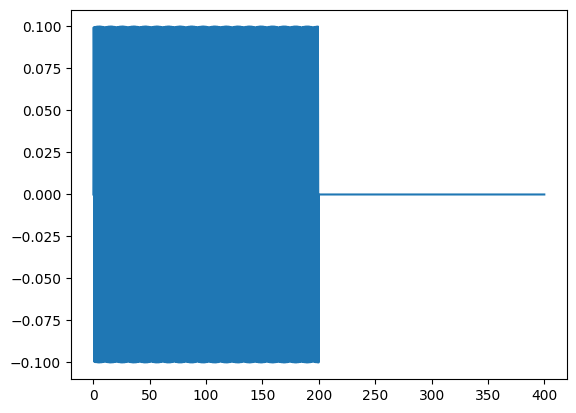

In [75]:
# list of times for numerical simulation (in units of ns)

tlist = np.linspace(0, 400, 10000)


plt.figure()
plt.plot(tlist, Hrd_coeff(tlist, {'A': 0.1, 'T': 200, 'omega_rd': detune_in}))

In [76]:
H0 = detune_pa * tensor(a.dag()*a, qeye(N_B)) + detune_pb * tensor(qeye(N_A), b.dag()*b) + J_0 * (tensor(a.dag(), b) + tensor(a, b.dag())) + 0.5 * Omega_p * (tensor(qeye(N_A), b**2 + b.dag()**2))
H1 = 1j * 2 * np.sqrt(2) * kappa * tensor(a.dag() - a, qeye(N_B))

psi_0 = tensor(basis(N_A, 0), basis(N_B, 0))

In [77]:
tlist = np.linspace(0, 400, 10000)

result = mesolve(
    [H0, [H1, Hrd_coeff]],
    psi_0,
    tlist,
    c_ops = [np.sqrt(kappa) * tensor(a, qeye(N_B)), np.sqrt(kappa) * tensor(qeye(N_A), b)],
    args = {'A': 1, 'T': 200, 'omega_rd': detune_in},
    e_ops = [tensor(a.dag()*a, qeye(N_B)), tensor(a, qeye(N_B)), tensor(a.dag(), qeye(N_B)), tensor(qeye(N_A), b.dag()*b)],
)

Text(0, 0.5, 'Average Photon number')

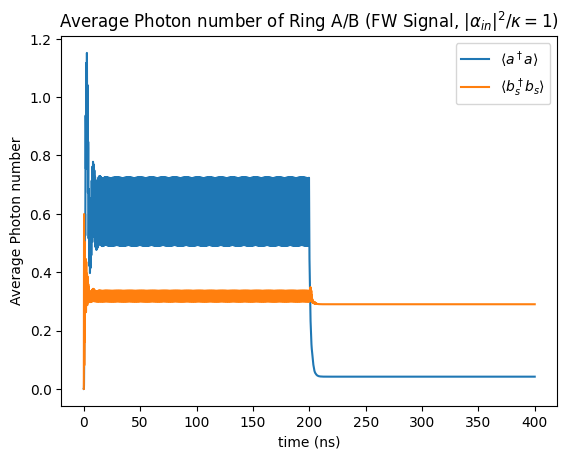

In [78]:
# Average photon number of Ring A/B FW signal case

plt.figure()
plt.plot(tlist, result.expect[0], label = r"$\langle a^\dagger a \rangle$")
plt.plot(tlist, result.expect[3], label = r"$\langle b_s^\dagger b_s \rangle$")

plt.legend()
plt.title(r"Average Photon number of Ring A/B (FW Signal, $|\alpha_{in}|^2/\kappa = 1$)")
plt.xlabel("time (ns)")
plt.ylabel("Average Photon number")

## BW Signal Time Evolution

Simulation at $\Delta / \kappa = 2$, $|\alpha|^2 / \kappa = 1$

BW Hamiltonian in the frame rotating at $ \frac{\omega_p}{2}$

$ H = H_A + H_B + H_C $

$ H_A = \Delta_p^a a^\dagger a + i \sqrt{2 \kappa_{ex1}} (a_{in} a^\dagger e^{-i \Delta_{in}t} - a_{in}^\dagger a e^{i \Delta_{in}t}) $

$ H_B = \Delta_p^b b^\dagger b + \frac{\Omega_p}{2} (e^{-i\theta_p} b^{\dagger 2} + e^{i\theta_p} b^2 )   $

$ H_J = J_0 (a^\dagger b + a b^\dagger)  $

In [81]:
# Hilbert Space Dimension

N_A = 5       # dimension of Hilbert space (Ring A)
N_B = 3       # dimension of Hilbert space (Ring B)


# Basic Parameters

kappa = 2 * np.pi * 0.10      # intrinsic + extrinsic linwidth of Ring A/B in units of GHz

detune_pa = 10.3 * kappa      # Ring A frequency in the frame rotating omega_p/2
detune_pb = 10.3 * kappa      # Ring B frequency in the frame rotating omega_p/2
Omega_p = 10 * kappa          # Pump signal strength
J_0 = 0.99 * kappa            # Coupling strength between Ring A and Ring B

kappa_ex1 = 0.99 * kappa      # extrinsic linwidth of Ring A in units of GHz
kappa_ex2 = 0.99 * kappa      # extrinsic linwidth of Ring B in units of GHz

beta = Omega_p / detune_pb
rp = 0.25 * np.log((1+beta)/(1-beta))
J_s = np.cosh(rp)*J_0
detune_pbs = detune_pb * np.sqrt(1-beta**2)

detune = 2 * kappa
detune_in = detune_pb - detune


# Basic Operators

a = destroy(N_A)
b = destroy(N_B)

In [82]:
# time-dependent coefficient for drive
def Hrd_env(t, args):
    """
    Envelope function for the readout drive
    """
    A = args['A'] # amplitude of the readout drive
    T = args['T'] # duration of the readout drive, in units of ns

    return A * (0 <= t) * (t <= T)


def Hrd_coeff(t, args):
    omega_rd = args['omega_rd']
    return Hrd_env(t, args) * np.sin(omega_rd * t)

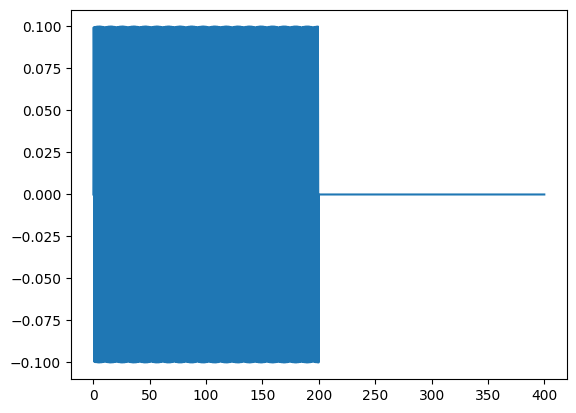

In [83]:
# list of times for numerical simulation (in units of ns)

tlist = np.linspace(0, 400, 10000)


plt.figure()
plt.plot(tlist, Hrd_coeff(tlist, {'A': 0.1, 'T': 200, 'omega_rd': detune_in}))

In [84]:
H0 = detune_pa * tensor(a.dag()*a, qeye(N_B)) + detune_pb * tensor(qeye(N_A), b.dag()*b) + J_0 * (tensor(a.dag(), b) + tensor(a, b.dag()))
H1 = 1j * 2 * np.sqrt(2) * kappa * tensor(a.dag() - a, qeye(N_B))

psi_0 = tensor(basis(N_A, 0), basis(N_B, 0))

In [85]:
tlist = np.linspace(0, 400, 10000)

result = mesolve(
    [H0, [H1, Hrd_coeff]],
    psi_0,
    tlist,
    c_ops = [np.sqrt(kappa) * tensor(a, qeye(N_B)), np.sqrt(kappa) * tensor(qeye(N_A), b)],
    args = {'A': 1, 'T': 200, 'omega_rd': detune_in},
    e_ops = [tensor(a.dag()*a, qeye(N_B)), tensor(a, qeye(N_B)), tensor(a.dag(), qeye(N_B)), tensor(qeye(N_A), b.dag()*b)],
)

Text(0, 0.5, 'Average Photon number')

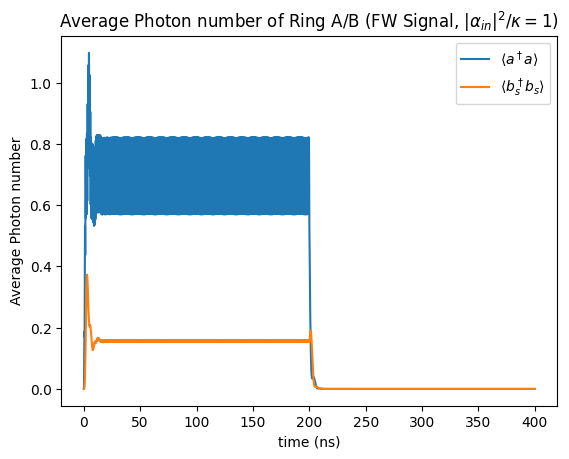

In [86]:
# Average photon number of Ring A/B FW signal case

plt.figure()
plt.plot(tlist, result.expect[0], label = r"$\langle a^\dagger a \rangle$")
plt.plot(tlist, result.expect[3], label = r"$\langle b_s^\dagger b_s \rangle$")

plt.legend()
plt.title(r"Average Photon number of Ring A/B (FW Signal, $|\alpha_{in}|^2/\kappa = 1$)")
plt.xlabel("time (ns)")
plt.ylabel("Average Photon number")

## Figure 2(a) Reproduce by QuTiP Simulation

$T_{12/21} = \frac{\langle a_{out}^\dagger a_{out} \rangle}{\langle a_{in}^\dagger a_{in} \rangle} = \frac{|\alpha|^2 - \sqrt{2 \kappa} \alpha (\langle a \rangle + \langle a^\dagger \rangle) + 2 \kappa \langle a^\dagger a \rangle }{|\alpha|^2}$

$T_{23} = \frac{\langle b_{out}^\dagger b_{out} \rangle}{\langle a_{in}^\dagger a_{in} \rangle} = \frac{2 \kappa \langle b^\dagger b \rangle}{|\alpha|^2}$



In [220]:
# Hilbert Space Dimension

N_A = 5                       # dimension of Hilbert space (Ring A)
N_B = 3                       # dimension of Hilbert space (Ring B)


# Basic Parameters

kappa = 2 * np.pi * 1.00      # intrinsic + extrinsic linwidth of Ring A/B in units of GHz

detune_pa = 10.3 * kappa      # Ring A frequency in the frame rotating omega_p/2
detune_pb = 10.3 * kappa      # Ring B frequency in the frame rotating omega_p/2
Omega_p = 10 * kappa          # Pump signal strength
J_0 = 0.99 * kappa            # Coupling strength between Ring A and Ring B

kappa_ex1 = 0.99 * kappa      # extrinsic linwidth of Ring A in units of GHz
kappa_ex2 = 0.99 * kappa      # extrinsic linwidth of Ring B in units of GHz

beta = Omega_p / detune_pb
rp = 0.25 * np.log((1+beta)/(1-beta))
J_s = np.cosh(rp)*J_0
detune_pbs = detune_pb * np.sqrt(1-beta**2)

detune = np.linspace(-10,15,50)
detune_in = detune_pb - detune * kappa


# Basic Operators

a = destroy(N_A)
b = destroy(N_B)

In [221]:
# time-dependent coefficient for drive
def Hrd_env(t, args):
    """
    Envelope function for the readout drive
    """
    A = args['A'] # amplitude of the readout drive
    T = args['T'] # duration of the readout drive, in units of ns

    return A * (0 <= t) * (t <= T)


def Hrd_coeff(t, args):
    omega_rd = args['omega_rd']
    return Hrd_env(t, args) * np.cos(omega_rd * t)

In [222]:
H_0fw = detune_pa * tensor(a.dag()*a, qeye(N_B)) + detune_pb * tensor(qeye(N_A), b.dag()*b) + J_0 * (tensor(a.dag(), b) + tensor(a, b.dag())) + 0.5 * Omega_p * (tensor(qeye(N_A), b**2 + b.dag()**2))
H_1fw = 1j * 2 * np.sqrt(2) * kappa * tensor(a.dag() - a, qeye(N_B))

psi_0 = tensor(basis(N_A, 0), basis(N_B, 0))

In [223]:
photonnumber_afw = []
annihilate_afw = []
create_afw = []
photonnumber_bfw = []

A_drive = 1

for i in range(50):
  tlist = np.linspace(0, 40, 400)

  result = mesolve(
    [H_0fw, [H_1fw, Hrd_coeff]],
    psi_0,
    tlist,
    c_ops = [np.sqrt(kappa) * tensor(a, qeye(N_B)), np.sqrt(kappa) * tensor(qeye(N_A), b)],
    args = {'A': A_drive, 'T': 200, 'omega_rd': detune_in[i]},
    e_ops = [tensor(a.dag()*a, qeye(N_B)), tensor(a, qeye(N_B)), tensor(a.dag(), qeye(N_B)), tensor(qeye(N_A), b.dag()*b)],
  )

  photonnumber_afw.append(np.mean(result.expect[0][350:]))
  annihilate_afw.append(np.mean(result.expect[1][350:]))
  create_afw.append(np.mean(result.expect[2][350:]))
  photonnumber_bfw.append(np.mean(result.expect[3][350:]))


photonnumber_afw  = np.array(photonnumber_afw)
annihilate_afw    = np.array(annihilate_afw)
create_afw        = np.array(create_afw)
photonnumber_bfw  = np.array(photonnumber_bfw)

Text(0, 0.5, 'Average Photon number')

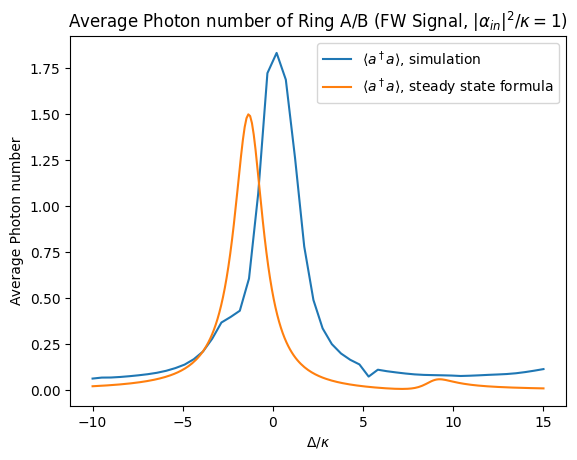

In [224]:
# Average photon number of Ring A/B FW signal case

plt.figure()
plt.plot(detune, photonnumber_afw, label = r"$\langle a^\dagger a \rangle$, simulation")
plt.plot(detune_list, na_fw, label = r"$\langle a^\dagger a \rangle$, steady state formula")

plt.legend()
plt.title(r"Average Photon number of Ring A/B (FW Signal, $|\alpha_{in}|^2/\kappa = 1$)")
plt.xlabel(r"$\Delta / \kappa$")
plt.ylabel("Average Photon number")

In [225]:
T_12_simul = 1 - np.sqrt(2) * (annihilate_afw + create_afw) / A_drive + 2 * photonnumber_afw / A_drive**2

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Transmission')

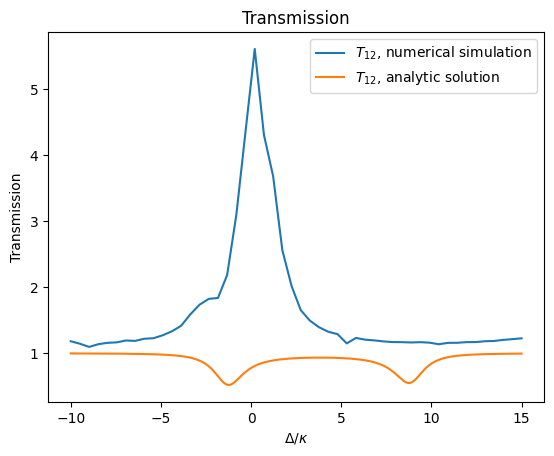

In [226]:
# Average photon number of Ring A/B FW signal case

plt.figure()
plt.plot(detune, T_12_simul, label = r"$T_{12}$, numerical simulation")
plt.plot(detune_list, T_12, label = r"$T_{12}$, analytic solution")

plt.legend()
plt.title(r"Transmission")
plt.xlabel(r"$\Delta / \kappa$")
plt.ylabel("Transmission")

In [227]:
H_0bw = detune_pa * tensor(a.dag()*a, qeye(N_B)) + detune_pb * tensor(qeye(N_A), b.dag()*b) + J_0 * (tensor(a.dag(), b) + tensor(a, b.dag()))
H_1bw = 1j * 2 * np.sqrt(2) * kappa * tensor(a.dag() - a, qeye(N_B))

psi_0 = tensor(basis(N_A, 0), basis(N_B, 0))

In [228]:
photonnumber_abw = []
annihilate_abw = []
create_abw = []
photonnumber_bbw = []


for i in range(50):
  tlist = np.linspace(0, 40, 400)

  result = mesolve(
    [H_0bw, [H_1bw, Hrd_coeff]],
    psi_0,
    tlist,
    c_ops = [np.sqrt(kappa) * tensor(a, qeye(N_B)), np.sqrt(kappa) * tensor(qeye(N_A), b)],
    args = {'A': 1, 'T': 200, 'omega_rd': detune_in[i]},
    e_ops = [tensor(a.dag()*a, qeye(N_B)), tensor(a, qeye(N_B)), tensor(a.dag(), qeye(N_B)), tensor(qeye(N_A), b.dag()*b)],
  )

  photonnumber_abw.append(np.mean(result.expect[0][350:]))
  annihilate_abw.append(np.mean(result.expect[1][350:]))
  create_abw.append(np.mean(result.expect[2][350:]))
  photonnumber_bbw.append(np.mean(result.expect[3][350:]))


photonnumber_abw  = np.array(photonnumber_abw)
annihilate_abw    = np.array(annihilate_abw)
create_abw        = np.array(create_abw)
photonnumber_bbw  = np.array(photonnumber_bbw)

Text(0, 0.5, 'Average Photon number')

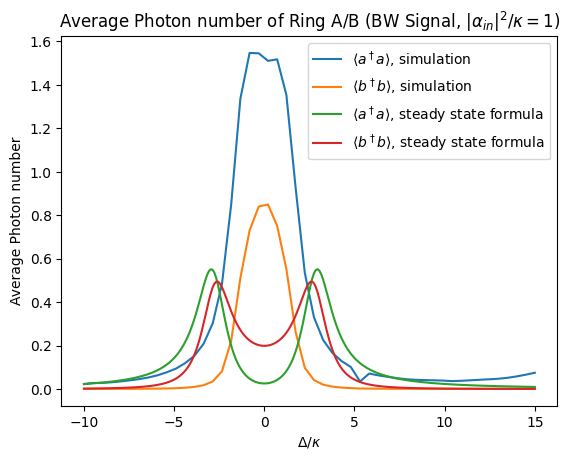

In [229]:
# Average photon number of Ring A/B BW signal case

plt.figure()
plt.plot(detune, photonnumber_abw, label = r"$\langle a^\dagger a \rangle$, simulation")
plt.plot(detune, photonnumber_bbw, label = r"$\langle b^\dagger b \rangle$, simulation")
plt.plot(detune_list, na_bw, label = r"$\langle a^\dagger a \rangle$, steady state formula")
plt.plot(detune_list, nb_bw, label = r"$\langle b^\dagger b \rangle$, steady state formula")

plt.legend()
plt.title(r"Average Photon number of Ring A/B (BW Signal, $|\alpha_{in}|^2/\kappa = 1$)")
plt.xlabel(r"$\Delta / \kappa$")
plt.ylabel("Average Photon number")

Text(0, 0.5, 'Average Photon number')

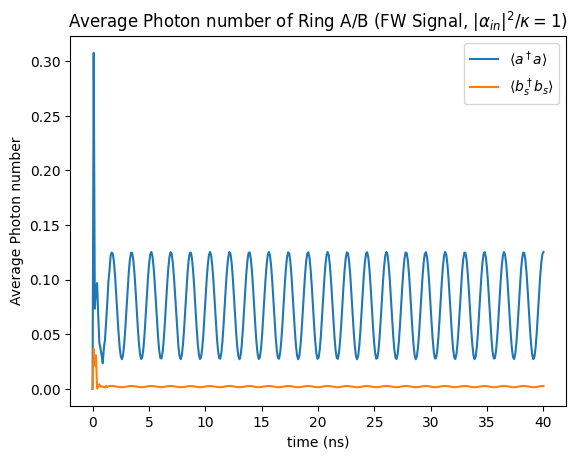

In [230]:
# Average photon number of Ring A/B FW signal case

plt.figure()
plt.plot(tlist, result.expect[0], label = r"$\langle a^\dagger a \rangle$")
plt.plot(tlist, result.expect[3], label = r"$\langle b_s^\dagger b_s \rangle$")

plt.legend()
plt.title(r"Average Photon number of Ring A/B (FW Signal, $|\alpha_{in}|^2/\kappa = 1$)")
plt.xlabel("time (ns)")
plt.ylabel("Average Photon number")